# MNIST Digit Recognition with CNN
## Theoretical Foundations in Machine Learning
## 1. Importing required files

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

## 2. Data Preprocessing
> **Normalization**: Scaling pixel values to the [0–1] range helps stabilize gradient descent during training.  
> **One-hot Encoding**: Transforms class labels into a binary matrix representation, essential for multi-class classification.

For a quick understanding of one-hot encoding, refer to this video: [YouTube - One Hot Encoding](https://www.youtube.com/watch?v=i2JSH5tn2qc)

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the image data
X_train = X_train.reshape(-1,28,28,1).astype('float32') / 255
X_test = X_test.reshape(-1,28,28,1).astype('float32') / 255

# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## 3. Conceptual Questions
- **Why use CNNs instead of traditional models like Random Forests or SVMs for this MNIST image classification?**
  
- **Why are non-linear activation functions essential in neural networks? Which activation function is most appropriate here, and why?**


1.
CNNs have the spatial structure of images through convolutional filters, capturing local patterns (e.g., edges, shapes) effectively, unlike Random Forests or SVMs, which treat pixels as independent features and lose spatial relationships.

CNNs use shared weights in convolutional layers, reducing the number of parameters compared to fully connected models

CNNs automatically learn hierarchical features (low-level edges to high-level patterns), while Random Forests and SVMs require aditional hand picked features, which are less effective for complex image tasks.

CNNs scale better to larger datasets and higher-resolution images due to their ability to generalize spatial patterns.

2.
 Non-linear activation functions (e.g., ReLU, sigmoid) allow neural networks to model complex, non-linear relationships in data. Without them, a neural network would behave like a linear model, limiting its ability to solve complex problems like image classification.


## 4. Model Architecture
> Experiment with different combinations of:
> - Convolutional layers
> - Filter sizes
> - Activation functions
> - Pooling strategies

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/Users/surya/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Model Training
> Experiment with various:
> - **Optimizers** (e.g., Adam, SGD with momentum, RMSprop)
> - **Loss Functions** (e.g., categorical crossentropy, KL divergence, hinge loss)
> - **Hyperparameters** (e.g., learning rate, batch size, number of epochs)

Evaluate:
- Training speed and convergence
- Validation accuracy
- Computational efficiency

Justify the best combination based on both empirical performance and theoretical understanding.

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7594 - loss: 0.7427 - val_accuracy: 0.9766 - val_loss: 0.0773
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9675 - loss: 0.1074 - val_accuracy: 0.9846 - val_loss: 0.0475
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9773 - loss: 0.0749 - val_accuracy: 0.9883 - val_loss: 0.0436
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9847 - loss: 0.0508 - val_accuracy: 0.9883 - val_loss: 0.0394
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9876 - loss: 0.0416 - val_accuracy: 0.9892 - val_loss: 0.0374
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9866 - loss: 0.0387 - val_accuracy: 0.9901 - val_loss: 0.0347
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9906 - loss: 0.0331 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9916 - loss: 0.0261 - val_accu

## 6. Model Evaluation
Evaluate the model using the following metrics:
- **Accuracy**: Overall classification performance
- **Confusion Matrix**: Class-wise prediction performance
- **Classification Report**: Precision, recall, F1-score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0358
Test Accuracy: 0.9923
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



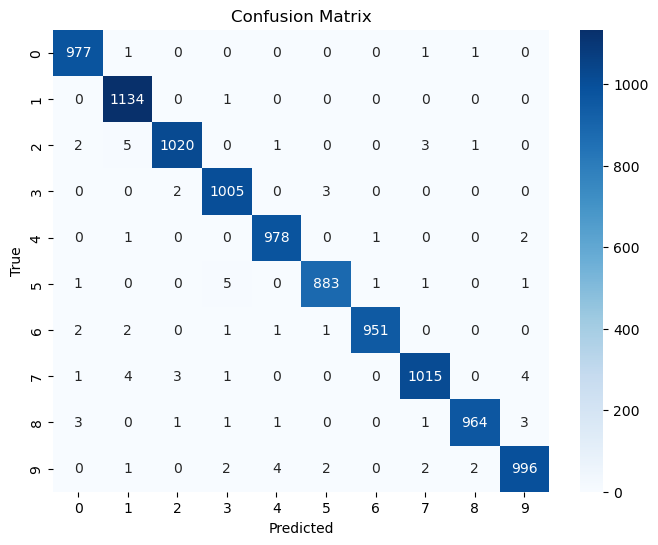

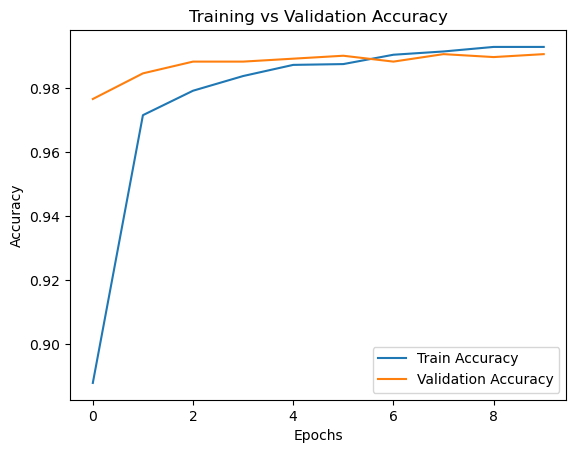

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7. Overfitting Mitigation Strategies
> Techniques to reduce overfitting in CNNs:
- Data augmentation
- Dropout layers
- L2 regularization
- Early stopping

## 8. Hyperparameter Tuning Guide
| Parameter       | Suggested Range       |
|----------------|------------------------|
| Learning Rate   | 1e-2 to 1e-5           |
| Batch Size      | 32 to 256              |
| Filter Sizes    | 32 to 128              |
| Dense Units     | 64 to 512              |